The data set I decided to anaylize was about eye health and other health diagnostics. The data on the file has name, age, if the person has eye disease, diabetic retinopathy, their sugar percentance, glucose percentage, cholesterol percentage, obesity percentage, blood pressure, and heart rate. All of the patients have a unqiue identifier such as patient 1 or patient 2 and this data is for 200,000 patients.

I am interested in how the different health diagnostics vary with age and what health metrics have an impact on eye disease.

In [23]:

dialogs <- read_csv("patient_data.csv")
head(dialogs)

Rows: 20000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, blood_pressure
dbl (6): age, sugar_percentage, glucose_percentage, cholesterol_percentage, ...
lgl (2): has_eye_disease, has_diabetic_retinopathy

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,age,has_eye_disease,has_diabetic_retinopathy,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,blood_pressure,heart_rate
<chr>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Patient 1,39,FALSE,FALSE,5.70,147.48,164.45,32.94,122/63,94
Patient 2,67,TRUE,FALSE,8.72,91.52,235.62,39.58,92/80,68
Patient 3,44,TRUE,FALSE,13.83,160.17,299.13,38.45,140/60,67
Patient 4,46,TRUE,TRUE,9.48,106.84,236.75,29.10,132/83,82
Patient 5,39,FALSE,FALSE,5.60,158.65,182.11,16.25,128/72,63
Patient 6,46,FALSE,FALSE,8.51,79.51,225.61,39.66,110/88,75


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 20000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, blood_pressure
dbl (6): age, sugar_percentage, glucose_percentage, cholesterol_percentage, ...
lgl (2): has_eye_disease, has_diabetic_retinopathy

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


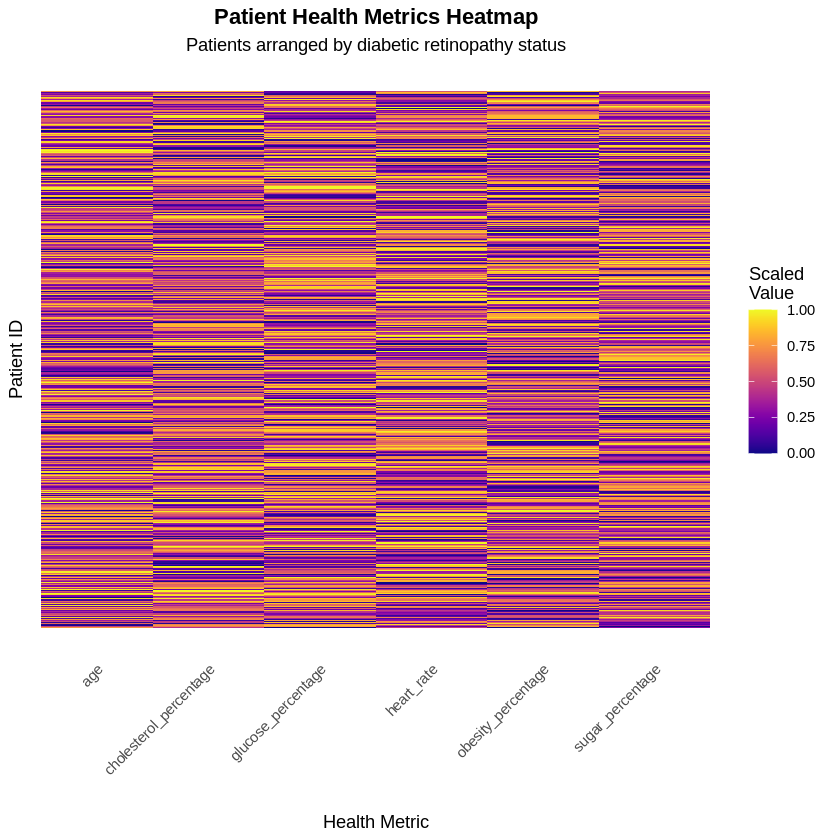

In [25]:
install.packages("viridis")
library(tidyverse)
library(ggplot2)
library(viridis)

dialogs <- read_csv("patient_data.csv")

heatmap_data <- dialogs %>%
  select(age, sugar_percentage, glucose_percentage,
         cholesterol_percentage, obesity_percentage, heart_rate,
         has_diabetic_retinopathy) %>%
  drop_na() %>%
  sample_n(min(500, n())) %>%
  arrange(has_diabetic_retinopathy) %>%
  mutate(patient_id = row_number()) %>%
  mutate(across(c(age, sugar_percentage, glucose_percentage,
                  cholesterol_percentage, obesity_percentage, heart_rate),
                ~scales::rescale(.x, to = c(0, 1))))
                heatmap_long <- heatmap_data %>%
  pivot_longer(cols = c(age, sugar_percentage, glucose_percentage,
                       cholesterol_percentage, obesity_percentage, heart_rate),
               names_to = "variable",
               values_to = "value")
               ggplot(heatmap_long, aes(x = variable, y = patient_id, fill = value)) +
  geom_tile() +
  scale_fill_viridis(option = "plasma", name = "Scaled\nValue") +
  labs(title = "Patient Health Metrics Heatmap",
       subtitle = "Patients arranged by diabetic retinopathy status",
       x = "Health Metric",
       y = "Patient ID") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
        panel.grid = element_blank())


Rows: 20000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, blood_pressure
dbl (6): age, sugar_percentage, glucose_percentage, cholesterol_percentage, ...
lgl (2): has_eye_disease, has_diabetic_retinopathy

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

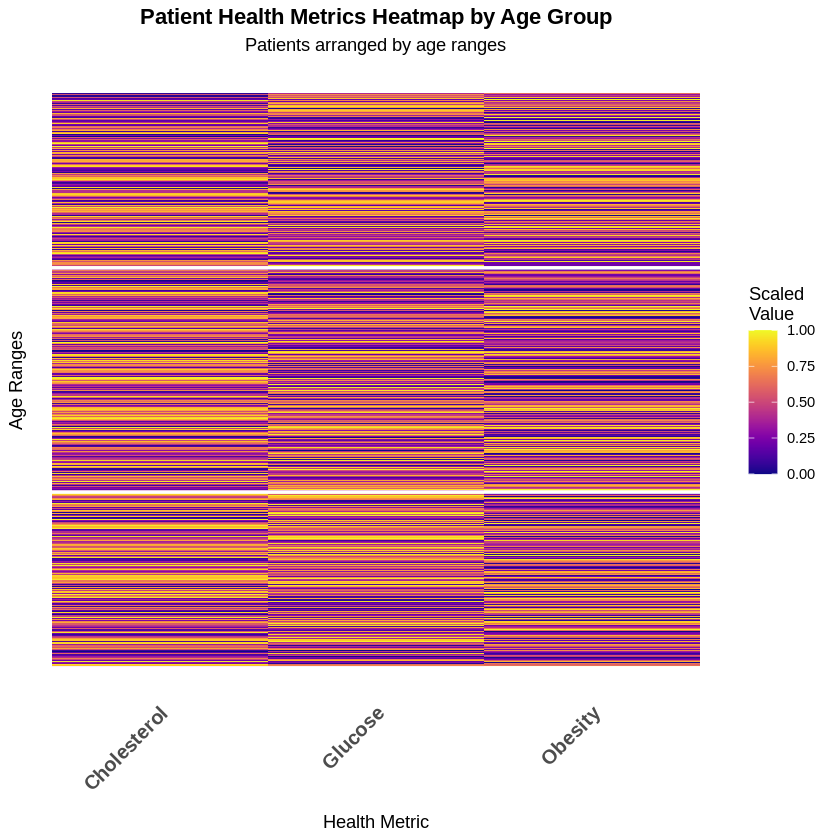

In [ ]:
library(tidyverse)
library(viridis)

dialogs <- read_csv("patient_data.csv")

heatmap_data <- dialogs %>%
  select(age, cholesterol_percentage, obesity_percentage,
         glucose_percentage, has_diabetic_retinopathy) %>%
  drop_na() %>%
  # Create age groups
  mutate(age_group = case_when(
    age >= 0 & age <= 24 ~ "0-24",
    age >= 25 & age <= 45 ~ "25-45",
    age >= 46 & age <= 65 ~ "46-65",
    age >= 66 & age <= 90 ~ "66-90",
    TRUE ~ "Other"
  )) %>%
  # Convert age_group to factor with correct order
  mutate(age_group = factor(age_group,
                            levels = c("0-24", "25-45", "46-65", "66-90"))) %>%
  # Sample patients for visualization
  sample_n(min(700, n())) %>%
  # Arrange by age group
  arrange(age_group) %>%
  # Add patient ID
  mutate(patient_id = row_number()) %>%
  # Scale the numeric variables to 0-1 range for better comparison
  mutate(across(c(cholesterol_percentage, obesity_percentage, glucose_percentage),
                ~scales::rescale(.x, to = c(0, 1))))

# Convert to long format for ggplot
heatmap_long <- heatmap_data %>%
  pivot_longer(cols = c(cholesterol_percentage, obesity_percentage, glucose_percentage),
               names_to = "variable",
               values_to = "value") %>%
  # Clean up variable names
  mutate(variable = str_replace(variable, "_percentage", ""),
         variable = str_to_title(variable))

# Create the heatmap
ggplot(heatmap_long, aes(x = variable, y = patient_id, fill = value)) +
  geom_tile() +
  scale_fill_viridis(option = "plasma", name = "Scaled\nValue") +
  # Add age group labels on the right side
  geom_hline(yintercept = c(
    sum(heatmap_data$age_group == "0-24"),
    sum(heatmap_data$age_group %in% c("0-24", "25-45")),
    sum(heatmap_data$age_group %in% c("0-24", "25-45", "46-65"))
  ), color = "white", linewidth = 1) +
  labs(title = "Patient Health Metrics Heatmap by Age Group",
       subtitle = "Patients arranged by age ranges",
       x = "Health Metric",
       y = "Age Ranges") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12, face = "bold"),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
        panel.grid = element_blank())

        scale_y_continuous(
    breaks = c(
      sum(heatmap_data$age_group == "0-24") / 2,
      sum(heatmap_data$age_group == "0-24") + sum(heatmap_data$age_group == "25-45") / 2,
      sum(heatmap_data$age_group %in% c("0-24", "25-45")) + sum(heatmap_data$age_group == "46-65") / 2,
      sum(heatmap_data$age_group %in% c("0-24", "25-45", "46-65")) + sum(heatmap_data$age_group == "66-90") / 2
    ),
    labels = c("0-24", "25-45", "46-65", "66-90")
  )

Rows: 20000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, blood_pressure
dbl (6): age, sugar_percentage, glucose_percentage, cholesterol_percentage, ...
lgl (2): has_eye_disease, has_diabetic_retinopathy

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


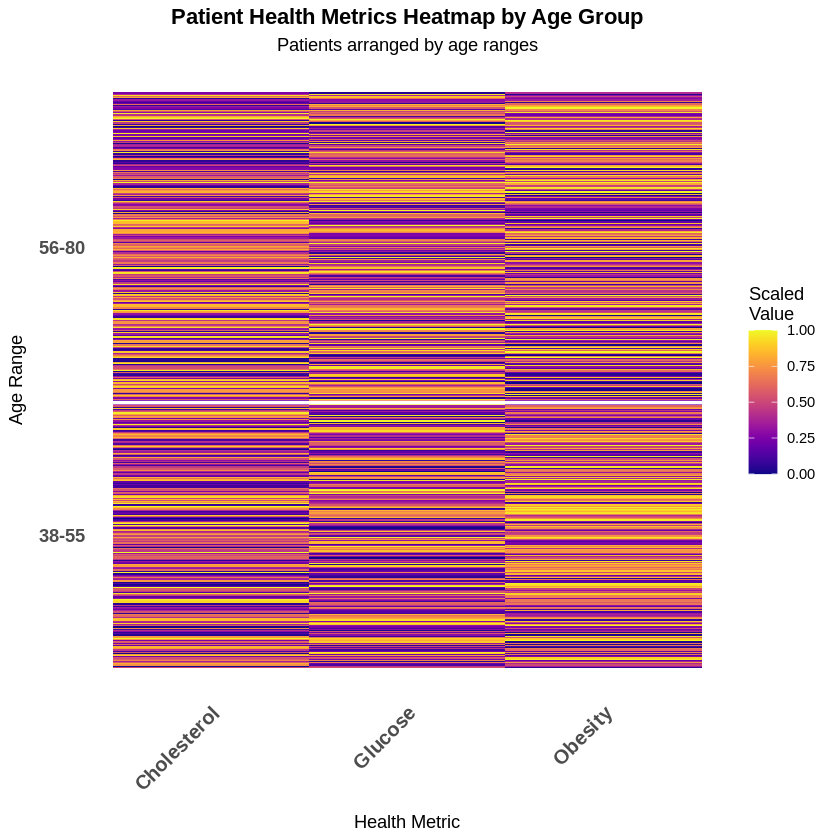

In [ ]:
library(tidyverse)
library(viridis)  # for color scales

# Read the data
dialogs <- read_csv("patient_data.csv")

# Prepare data with age groups
heatmap_data <- dialogs %>%
  select(age, cholesterol_percentage, obesity_percentage,
         glucose_percentage, has_diabetic_retinopathy) %>%
  drop_na() %>%
  # Create age groups
  mutate(age_group = case_when(
    age >= 38 & age <= 55 ~ "38-55",
    age >= 56 & age <= 80 ~ "56-80",
    TRUE ~ "Other"
  )) %>%
  # Remove "Other" category
  filter(age_group != "Other") %>%
  # Convert age_group to factor with correct order
  mutate(age_group = factor(age_group,
                            levels = c("38-55", "56-80"))) %>%
  # Sample patients for visualization
  sample_n(min(500, n())) %>%
  # Arrange by age group
  arrange(age_group) %>%
  # Add patient ID
  mutate(patient_id = row_number()) %>%
  # Scale the numeric variables to 0-1 range for better comparison
  mutate(across(c(cholesterol_percentage, obesity_percentage, glucose_percentage),
                ~scales::rescale(.x, to = c(0, 1))))

# Convert to long format for ggplot
heatmap_long <- heatmap_data %>%
  pivot_longer(cols = c(cholesterol_percentage, obesity_percentage, glucose_percentage),
               names_to = "variable",
               values_to = "value") %>%
  # Clean up variable names
  mutate(variable = str_replace(variable, "_percentage", ""),
         variable = str_to_title(variable))

# Create the heatmap
ggplot(heatmap_long, aes(x = variable, y = patient_id, fill = value)) +
  geom_tile() +
  scale_fill_viridis(option = "plasma", name = "Scaled\nValue") +
  # Add age group labels on the right side
  geom_hline(yintercept = sum(heatmap_data$age_group == "38-55"),
             color = "white", linewidth = 1) +
  labs(title = "Patient Health Metrics Heatmap by Age Group",
       subtitle = "Patients arranged by age ranges",
       x = "Health Metric",
       y = "Age Range") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12, face = "bold"),
        axis.text.y = element_text(size = 11, face = "bold"),
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
        panel.grid = element_blank()) +
  # Add age group labels to y-axis
  scale_y_continuous(
    breaks = c(
      sum(heatmap_data$age_group == "38-55") / 2,
      sum(heatmap_data$age_group == "38-55") + sum(heatmap_data$age_group == "56-80") / 2
    ),
    labels = c("38-55", "56-80")
  )

First I decided to do a general heatmap of the patient ids and all of the health conditions, I realized that there was a lot of data to look at and I was not seeing a lot of trends. I then proceeded to choose health metrics that I thought would be most correlated with each other which was cholesterol glucose and obesity. Originally I had my graph from the ages ranges 0-24, "25-45, 46-65, and 66-90 but then I realized that the ages there were in my data set started at 35 and ended at 80, so I adjusted my age ranges in the last graph to see if there was any visual corelation.

While there were no largly significant corelations, it should be noted that in the mid 40s there was a larger patient population that was high in obesity which caused the glucose levels to be someone higher, however, the cholesterol values were varried.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 20000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, blood_pressure
dbl (6): age, sugar_percentage, glucose_percentage, cholesterol_percentage, ...
lgl (2): has_eye_disease, has_diabetic_retinopathy

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



PCA Summary:
Variance explained by each component:
                            PC1      PC2       PC3       PC4       PC5
Standard deviation     1.011551 1.010184 0.9997265 0.9952955 0.9944298
Proportion of Variance 0.170540 0.170080 0.1665800 0.1651000 0.1648200
Cumulative Proportion  0.170540 0.340620 0.5071900 0.6723000 0.8371100

Loadings (correlations between original variables and PCs):
                               PC1         PC2
age                     0.56257580  0.06272124
sugar_percentage        0.01327592 -0.64875015
glucose_percentage      0.49655521  0.25876186
cholesterol_percentage  0.47025079 -0.16551458
obesity_percentage      0.36499056 -0.54703193
heart_rate             -0.28707355 -0.42613680


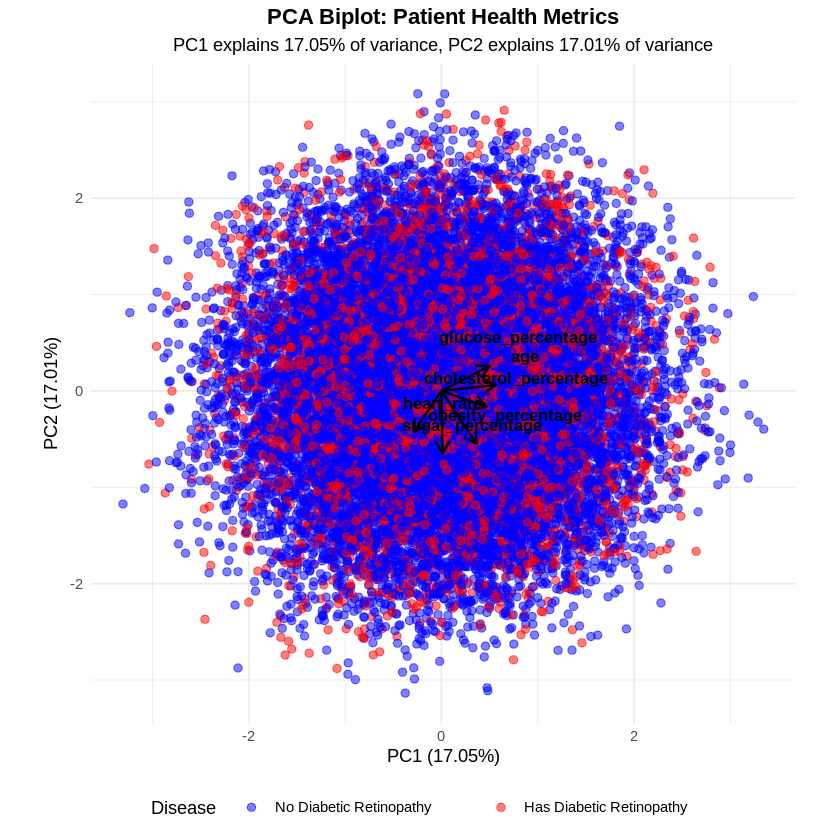

In [ ]:
install.packages("ggfortify")
library(tidyverse)
library(ggplot2)
library(ggfortify)

dialogs <- read_csv("patient_data.csv")

pca_data <- dialogs %>%
  select(age, sugar_percentage, glucose_percentage,
         cholesterol_percentage, obesity_percentage, heart_rate) %>%
  drop_na()

disease_status <- dialogs %>%
  drop_na(age, sugar_percentage, glucose_percentage,
          cholesterol_percentage, obesity_percentage, heart_rate) %>%
  pull(has_diabetic_retinopathy)

pca_result <- prcomp(pca_data, scale. = TRUE)

var_explained <- summary(pca_result)$importance[2, 1:2] * 100
pc1_var <- round(var_explained[1], 2)
pc2_var <- round(var_explained[2], 2)

pca_df <- data.frame(
  PC1 = pca_result$x[, 1],
  PC2 = pca_result$x[, 2],
  Disease = factor(disease_status,labels = c("No Diabetic Retinopathy", "Has Diabetic Retinopathy")))

  loadings <- as.data.frame(pca_result$rotation[, 1:2])
loadings$variable <- rownames(loadings)
ggplot(pca_df, aes(x = PC1, y = PC2, color = Disease)) +
  geom_point(alpha = 0.5, size = 2) +

  geom_segment(data = loadings,
               aes(x = 0, y = 0, xend = PC1, yend = PC2),
               arrow = arrow(length = unit(0.3, "cm")),
               color = "black", linewidth = 0.7,
               inherit.aes = FALSE) +

               geom_text(data = loadings,
            aes(x = PC1, y = PC2, label = variable),
            color = "black", size = 3.5,
            fontface = "bold",
            nudge_x = 0.3, nudge_y = 0.3,
            inherit.aes = FALSE) +
  scale_color_manual(values = c("blue", "red")) +
  labs(title = "PCA Biplot: Patient Health Metrics",
       subtitle = paste0("PC1 explains ", pc1_var, "% of variance, ",
                        "PC2 explains ", pc2_var, "% of variance"),
       x = paste0("PC1 (", pc1_var, "%)"),
       y = paste0("PC2 (", pc2_var, "%)")) +
  theme_minimal() +
  theme(legend.position = "bottom",
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5)) +
  coord_fixed()

cat("\nPCA Summary:\n")
cat("Variance explained by each component:\n")
print(summary(pca_result)$importance[, 1:5])

cat("\nLoadings (correlations between original variables and PCs):\n")
print(pca_result$rotation[, 1:2])

I then decided to do a pca bioplot to see if there would be an significant clusters based on patients that have diabetric retinopathy vs those that do not. As shown above there was no visible cluster seperation and there is heavy overlap. However the catagories that had the largest varience and most positive contributors according to the table were age cholester, obesity, and glucose which interestingly the catagories I chose the do my heat map in (when doing the heatmap I was not aware that these factors were positive contributors). The negative contributor was heartrate. The PC1 represents the patents age and metabolic factors whereas PC2 represents sugar and obesity. Overall I needed to look at more factors and include more dimentionality in my data analysis to understand any corelations in my data and while using a pca for dimentiality reduction can be significant for certain data analysis I decided to continue on with clustering to see if anything more significant will apear

Rows: 20000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, blood_pressure
dbl (6): age, sugar_percentage, glucose_percentage, cholesterol_percentage, ...
lgl (2): has_eye_disease, has_diabetic_retinopathy

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


=== K-means Results ===

Cluster assignments (first 50 patients):
 [1] 2 3 3 3 1 3 1 3 3 3 1 3 2 1 2 1 3 2 2 1 2 2 1 1 2 3 2 2 2 3 2 3 3 1 1 2 1 1
[39] 2 2 3 3 1 3 1 2 3 1 3 2

=== Cluster Centers (Means) ===
# A tibble: 3 × 7
  label__      age sugar_percentage glucose_percentage cholesterol_percentage
    <int>    <dbl>            <dbl>              <dbl>                  <dbl>
1       1  0.00259         -0.0339              0.0232                 -0.674
2       2 -0.0719           0.0428             -0.0681                 -0.566
3       3  0.0584          -0.00693             0.0374                  1.06 
# ℹ 2 more variables: obesity_percentage <dbl>, heart_rate <dbl>

=== Cluster vs Disease Comparison ===
       Disease
Cluster FALSE TRUE
      1  4749 1615
      2  4723 1516
      3  5618 1779

Proportions within each cluster:
       Disease
Cluster     FALSE      TRUE
      1 0.7462288 0.2537712
      2 0.7570123 0.2429877
      3 0.7594971 0.2405029


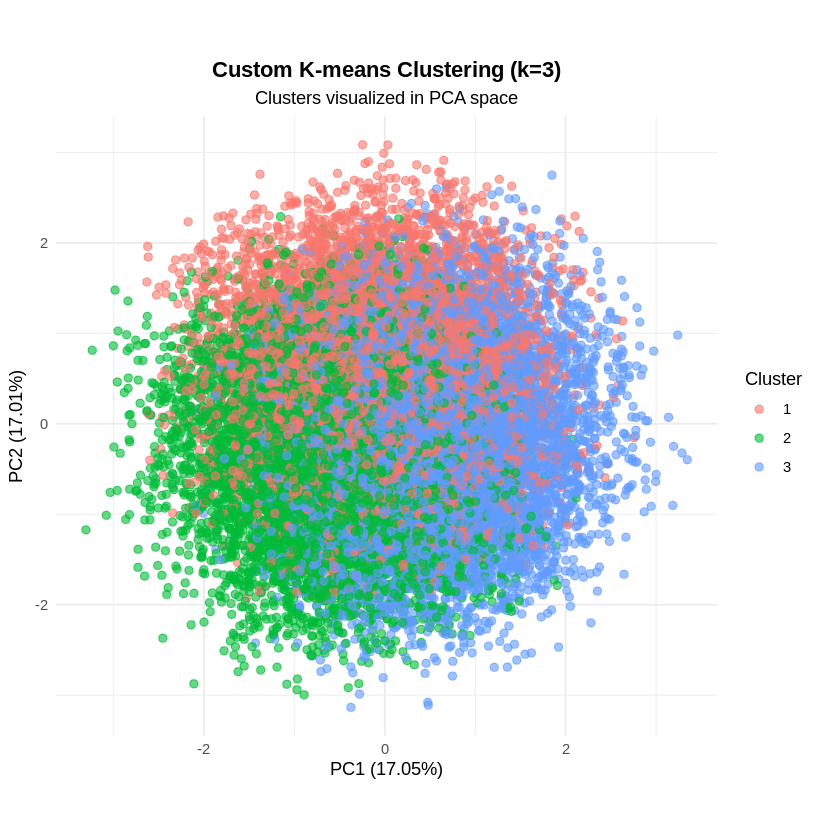


=== Cluster Characteristics ===
# A tibble: 3 × 9
  Cluster     n avg_age avg_sugar avg_glucose avg_cholesterol avg_obesity
    <int> <int>   <dbl>     <dbl>       <dbl>           <dbl>       <dbl>
1       1  6364    55.0      9.37        136.            161.        27.1
2       2  6239    53.9      9.62        132.            167.        27.6
3       3  7397    55.8      9.46        136.            261.        27.7
# ℹ 2 more variables: avg_heart_rate <dbl>, disease_rate <dbl>


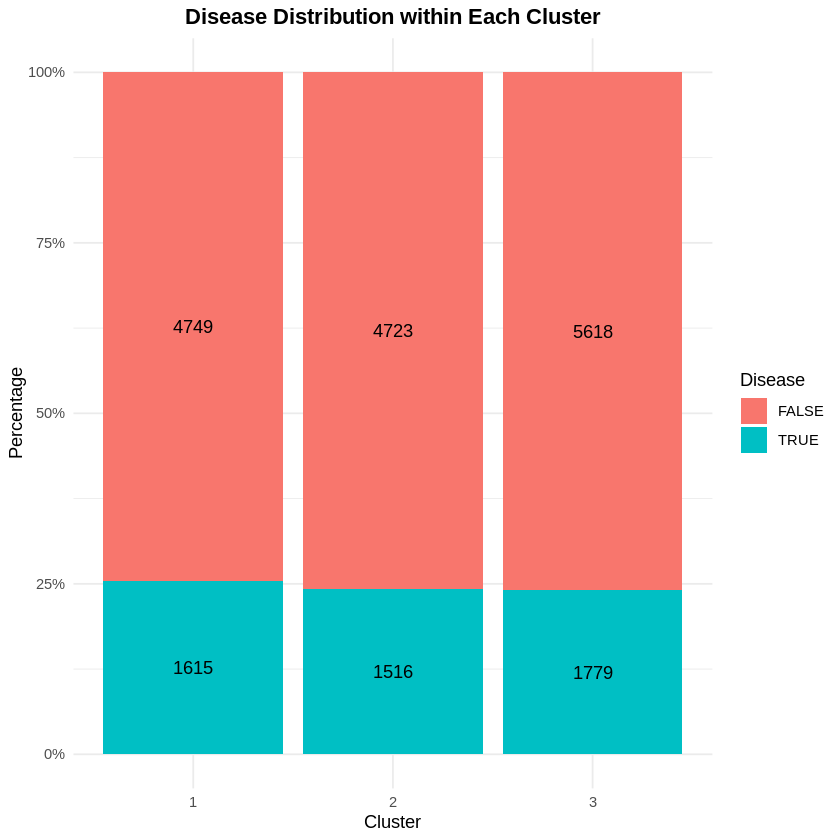

In [ ]:
library(tidyverse)

dialogs <- read_csv("patient_data.csv")

label_randomly <- function(n_points, n_clusters){
  sample(1:n_clusters, n_points, replace = TRUE)
}

get_cluster_means <- function(data, labels){
  data %>%
    mutate(label__ = labels) %>%
    group_by(label__) %>%
    summarize(across(everything(), mean), .groups = "drop") %>%
    arrange(label__)
}

assign_cluster <- function(data, means){
  dii <- 1:nrow(data)
  cii <- 1:nrow(means)
  labels <- c()

  for (point_index in dii){
    smallest_dist <- Inf
    smallest_label <- NA

    point <- as.numeric(data[point_index, ])

    for (clus_index in cii){
      clus_vec <- as.numeric(means[clus_index, colnames(means) != "label__"])
      diff <- point - clus_vec
      dist <- sum(diff * diff)
      if (dist < smallest_dist){
        smallest_dist <- dist
        smallest_label <- means[clus_index, ]$label__
      }
    }
    labels <- c(labels, smallest_label)
  }
  labels
}

kmeans_done <- function(old_means, new_means, eps = 1e-6){
  om <- as.matrix(old_means[, colnames(old_means) != "label__"])
  nm <- as.matrix(new_means[, colnames(new_means) != "label__"])
  m <- mean(sqrt(rowSums((om - nm)^2)))
  m < eps
}

mykmeans <- function(data, n_clusters, eps = 1e-6){
  labels <- label_randomly(nrow(data), n_clusters)
  old_means <- get_cluster_means(data, labels)
  done <- FALSE

  while (!done){
    labels <- assign_cluster(data, old_means)
    new_means <- get_cluster_means(data, labels)
    if (kmeans_done(old_means, new_means)){
      done <- TRUE
    } else {
      old_means <- new_means
    }
  }

  list(labels = labels, means = new_means)
}


X <- dialogs %>%
  select(age, sugar_percentage, glucose_percentage,
         cholesterol_percentage, obesity_percentage, heart_rate) %>%
  drop_na()

X_scaled <- as.data.frame(scale(X))

disease_labels <- dialogs %>%
  drop_na(age, sugar_percentage, glucose_percentage,
          cholesterol_percentage, obesity_percentage, heart_rate) %>%
  pull(has_diabetic_retinopathy)

set.seed(1)
results <- mykmeans(X_scaled, n_clusters = 3)

cat("=== K-means Results ===\n")
cat("\nCluster assignments (first 50 patients):\n")
print(head(results$labels, 50))

cat("\n=== Cluster Centers (Means) ===\n")
print(results$means)

pca_result <- prcomp(X_scaled)

cluster_viz <- data.frame(
  PC1 = pca_result$x[, 1],
  PC2 = pca_result$x[, 2],
  Cluster = factor(results$labels),
  Disease = factor(disease_labels,
                   labels = c("No Disease", "Has Disease"))
)

var_explained <- summary(pca_result)$importance[2, 1:2] * 100
pc1_var <- round(var_explained[1], 2)
pc2_var <- round(var_explained[2], 2)

cluster_plot <- ggplot(cluster_viz, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(alpha = 0.6, size = 2) +
  labs(title = "Custom K-means Clustering (k=3)",
       subtitle = "Clusters visualized in PCA space",
       x = paste0("PC1 (", pc1_var, "%)"),
       y = paste0("PC2 (", pc2_var, "%)")) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
        legend.position = "right") +
  coord_fixed()

print(cluster_plot)

comparison <- table(Cluster = results$labels,
                   Disease = disease_labels)

cat("\n=== Cluster vs Disease Comparison ===\n")
print(comparison)
cat("\nProportions within each cluster:\n")
print(prop.table(comparison, margin = 1))

comparison_df <- as.data.frame(comparison) %>%
  group_by(Cluster) %>%
  mutate(Proportion = Freq / sum(Freq))

comparison_plot <- ggplot(comparison_df,
                         aes(x = Cluster, y = Proportion, fill = Disease)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = Freq), position = position_fill(vjust = 0.5)) +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Disease Distribution within Each Cluster",
       y = "Percentage",
       x = "Cluster") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

print(comparison_plot)

cluster_summary <- X %>%
  mutate(
    Cluster = results$labels,
    Disease = disease_labels
  ) %>%
  group_by(Cluster) %>%
  summarise(
    n = n(),
    avg_age = mean(age),
    avg_sugar = mean(sugar_percentage),
    avg_glucose = mean(glucose_percentage),
    avg_cholesterol = mean(cholesterol_percentage),
    avg_obesity = mean(obesity_percentage),
    avg_heart_rate = mean(heart_rate),
    disease_rate = mean(Disease)
  )

cat("\n=== Cluster Characteristics ===\n")
print(cluster_summary)


There in the first graph done with 3 clusters and kmeans, 3 clear groups can be seen in the graph. Which means the k-means works and we dont see the same heavy overlap as the first pca. The red cluster represents some of the intermediate values with possibly higher sugar and obesity, the blue represents patients with patients with higher age/glucose/cholesterol, and the green represents patients with lower age/glucose/cholesterol levels. With this graph we can see that patents' age tends to group well with their expected metabolic rates meaning younger patients tends to have lower sugar etc. I wanted to see what percent of each population had diabetic retinopathy and if age or other factors were a contributor. I made a bar graph that showed this based on the clusters and much to my surprise each cluser had roughly the same amount of patients with diabetic retinopathy which demonstrates that this disease impacts all groups and the disease is more complex than simple groupings. For future directions I would like to look at the data by doing classification models such as a logistic regression. This would be good because diabetic retinopathy is a boolean variable and give us a visual that clustering failed to give, then we might be able to see a more visable corelation with certain health metrics and eye disease.